In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [3]:
pwd

'/home/jh20/Data/pet'

In [4]:
pet_df = pd.read_csv("/home/jh20/Data/pet/pet_metadata.csv")

In [82]:
pet_df.drop_duplicates(inplace=True)

In [79]:
pet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             148 non-null    object 
 1   species          148 non-null    int64  
 2   mission-id       148 non-null    object 
 3   provider-code    148 non-null    int64  
 4   breed            148 non-null    object 
 5   age              148 non-null    float64
 6   class            148 non-null    object 
 7   sex              148 non-null    object 
 8   weight           148 non-null    float64
 9   shoulder-height  148 non-null    float64
 10  neck-size        148 non-null    float64
 11  back-length      148 non-null    int64  
 12  chest-size       148 non-null    float64
 13  BCS              148 non-null    int64  
 14  body-part        148 non-null    int64  
 15  exercise         148 non-null    int64  
 16  food-count       148 non-null    int64  
 17  environment     

In [22]:
pet_df.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount', 'food-kind',
       'disease', 'diseaseName', 'CRP', 'lgG', 'IL-6', 'AFP', 'heart-rate',
       'breating-rate', 'body-heat', 'stress'],
      dtype='object')

In [23]:
pet_df.species.value_counts()

10    148
Name: species, dtype: int64

In [24]:
pet_df['provider-code'].value_counts()

16    128
10     20
Name: provider-code, dtype: int64

In [25]:
pet_df.breed.value_counts()   #품종이 다섯마리?

POO    59
CHI    37
DRI    19
ETC    18
POM    15
Name: breed, dtype: int64

In [26]:
POO_data = pet_df.loc[pet_df.breed=='POO']

In [27]:
POO_data

,type,species,mission-id,provider-code,breed,age,class,sex,weight,shoulder-height,...,disease,diseaseName,CRP,lgG,IL-6,AFP,heart-rate,breating-rate,body-heat,stress
7,B,10,10_001073,16,POO,5.25,SS,CM,3.86,22.0,...,NOR,NaN,1.15,10.76,3.60,0.55,142,33,40.0,8.9
8,B,10,10_001073,16,POO,5.25,SS,CM,3.86,22.0,...,NOR,NaN,1.15,10.76,3.60,0.55,142,33,40.0,8.9
9,B,10,10_001088,10,POO,2.00,SS,CM,8.80,34.0,...,NOR,NaN,0.24,5.10,2.11,0.55,84,24,39.0,1.3
11,B,10,10_001088,10,POO,2.00,SS,CM,8.80,34.0,...,NOR,NaN,0.24,5.10,2.11,0.55,84,24,39.0,1.3
13,B,10,10_001088,10,POO,2.00,SS,CM,8.80,34.0,...,NOR,NaN,0.24,5.10,2.11,0.55,84,24,39.0,1.3
14,B,10,10_001075,16,POO,8.00,SS,CM,8.30,30.0,...,NOR,NaN,0.72,4.09,4.47,0.54,124,36,38.4,3.2
16,B,10,10_001073,16,POO,5.25,SS,CM,3.86,22.0,...,NOR,NaN,1.15,10.76,3.60,0.55,142,33,40.0,8.9
19,B,10,10_001088,10,POO,2.00,SS,CM,8.80,34.0,...,NOR,NaN,0.24,5.10,2.11,0.55,84,24,39.0,1.3
20,B,10,10_001075,16,POO,8.00,SS,CM,8.30,30.0,...,NOR,NaN,0.72,4.09,4.47,0.54,124,36,38.4,3.2
21,B,10,10_001073,16,POO,5.25,SS,CM,3.86,22.0,...,NOR,NaN,1.15,10.76,3.60,0.55,142,33,40.0,8.9


In [62]:
data  = POO_data[[ 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'disease']]

In [63]:
data

,weight,shoulder-height,neck-size,back-length,chest-size,BCS,disease
7,3.86,22.0,22.5,35,32.00,5,NOR
8,3.86,22.0,22.5,35,32.00,5,NOR
9,8.80,34.0,32.0,35,47.00,5,NOR
11,8.80,34.0,32.0,35,47.00,5,NOR
13,8.80,34.0,32.0,35,47.00,5,NOR
14,8.30,30.0,28.0,49,46.99,6,NOR
16,3.86,22.0,22.5,35,32.00,5,NOR
19,8.80,34.0,32.0,35,47.00,5,NOR
20,8.30,30.0,28.0,49,46.99,6,NOR
21,3.86,22.0,22.5,35,32.00,5,NOR


In [64]:
Scaler = MinMaxScaler()

In [65]:
x_data = data.drop(['disease'],axis = 1)
y_data = data['disease']

In [66]:
x_data

,weight,shoulder-height,neck-size,back-length,chest-size,BCS
7,3.86,22.0,22.5,35,32.00,5
8,3.86,22.0,22.5,35,32.00,5
9,8.80,34.0,32.0,35,47.00,5
11,8.80,34.0,32.0,35,47.00,5
13,8.80,34.0,32.0,35,47.00,5
14,8.30,30.0,28.0,49,46.99,6
16,3.86,22.0,22.5,35,32.00,5
19,8.80,34.0,32.0,35,47.00,5
20,8.30,30.0,28.0,49,46.99,6
21,3.86,22.0,22.5,35,32.00,5


In [67]:
data_scale = Scaler.fit_transform(x_data)

In [68]:
data_scale

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       [0.89878543, 0.66666667, 0.57894737, 1.        , 0.99933333,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        0.        ],
       [0.89878543, 0.66666667, 0.57894737, 1.        , 0.99933333,
        1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 1

In [69]:
model = KMeans(n_clusters=3,random_state=10)

In [70]:
model.fit(data_scale)

KMeans(n_clusters=3, random_state=10)

In [71]:
len(model.labels_)

59

In [72]:
data['cluster'] = model.labels_

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


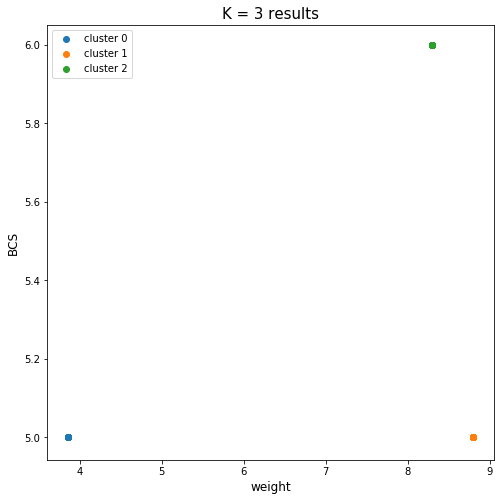

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.scatter(data.loc[data['cluster'] == i, 'weight'], data.loc[data['cluster'] == i, 'BCS'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%3 , size = 15)
plt.xlabel('weight', size = 12)
plt.ylabel('BCS', size = 12)
plt.show()

In [77]:
data.loc[data['cluster'] == 1, 'weight']

9      8.8
11     8.8
13     8.8
19     8.8
29     8.8
30     8.8
37     8.8
38     8.8
43     8.8
52     8.8
67     8.8
70     8.8
71     8.8
87     8.8
102    8.8
111    8.8
116    8.8
124    8.8
137    8.8
139    8.8
Name: weight, dtype: float64

In [8]:
pet_df['body-part']

0      11
1      17
2       8
3       8
4       7
       ..
143     9
144    10
145     2
146    12
147     7
Name: body-part, Length: 148, dtype: int64

In [12]:
new_df = pet_df[pet_df.columns.difference(['body-part'])].drop_duplicates()

In [13]:
new_df

,AFP,BCS,CRP,IL-6,age,back-length,body-heat,breating-rate,breed,chest-size,...,mission-id,neck-size,provider-code,sex,shoulder-height,snack-amount,species,stress,type,weight
0,0.57,6,2.85,1.86,10.10,37,38.9,24,DRI,46.50,...,10_001074,30.00,16,CM,24.5,10,10,1.3,B,8.80
1,0.55,4,1.48,4.44,11.10,29,38.1,33,CHI,31.00,...,10_000929,18.98,16,SF,19.0,10,10,8.6,B,2.50
2,0.54,4,0.29,3.27,8.00,24,40.0,36,CHI,29.00,...,10_000957,17.00,16,SF,17.0,0,10,3.6,B,1.80
5,0.55,5,6.55,2.82,4.10,31,38.7,21,POM,47.00,...,10_000930,30.00,16,CM,31.0,0,10,1.8,B,6.86
7,0.55,5,1.15,3.60,5.25,35,40.0,33,POO,32.00,...,10_001073,22.50,16,CM,22.0,20,10,8.9,B,3.86
9,0.55,5,0.24,2.11,2.00,35,39.0,24,POO,47.00,...,10_001088,32.00,10,CM,34.0,20,10,1.3,B,8.80
12,0.55,7,0.33,3.14,5.50,40,38.4,38,ETC,50.00,...,10_000928,31.00,16,CM,30.0,10,10,2.7,B,11.00
14,0.54,6,0.72,4.47,8.00,49,38.4,36,POO,46.99,...,10_001075,28.00,16,CM,30.0,10,10,3.2,B,8.30


In [37]:
new_df['food-count']

0     2
1     4
2     4
5     2
7     4
9     2
12    2
14    4
Name: food-count, dtype: int64

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 14
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AFP              8 non-null      float64
 1   BCS              8 non-null      int64  
 2   CRP              8 non-null      float64
 3   IL-6             8 non-null      float64
 4   age              8 non-null      float64
 5   back-length      8 non-null      int64  
 6   body-heat        8 non-null      float64
 7   breating-rate    8 non-null      int64  
 8   breed            8 non-null      object 
 9   chest-size       8 non-null      float64
 10  class            8 non-null      object 
 11  defecation       8 non-null      int64  
 12  disease          8 non-null      object 
 13  diseaseName      1 non-null      object 
 14  environment      8 non-null      int64  
 15  exercise         8 non-null      int64  
 16  food-amount      8 non-null      float64
 17  food-count       8 

In [54]:
a = round(new_df.corr(method='pearson')['BCS'][['back-length', 'chest-size', 'weight', 'neck-size', 
                                                'shoulder-height', 'exercise', 'breating-rate', 'heart-rate',
                                                'snack-amount', 'food-amount']], 3)

In [59]:
a = pd.DataFrame(a)
a.columns = ['corr_with_BCS']
a

,corr_with_BCS
back-length,0.787
chest-size,0.800
weight,0.895
neck-size,0.747
shoulder-height,0.593
exercise,-0.700
breating-rate,0.120
heart-rate,0.140
snack-amount,0.183
food-amount,-0.456


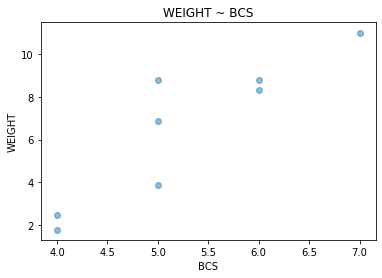

In [26]:
X = new_df.BCS.values
Y = new_df['weight'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('WEIGHT ~ BCS')
plt.xlabel('BCS')
plt.ylabel('WEIGHT')
plt.show()

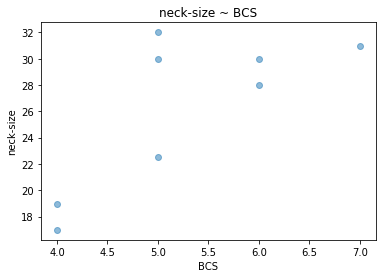

In [27]:
X = new_df.BCS.values
Y = new_df['neck-size'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('neck-size ~ BCS')
plt.xlabel('BCS')
plt.ylabel('neck-size')
plt.show()

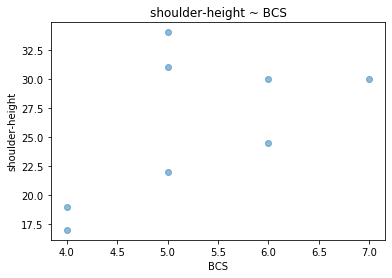

In [28]:
X = new_df.BCS.values
Y = new_df['shoulder-height'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('shoulder-height ~ BCS')
plt.xlabel('BCS')
plt.ylabel('shoulder-height')
plt.show()

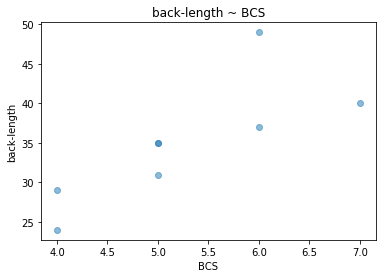

In [30]:
X = new_df.BCS.values
Y = new_df['back-length'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('back-length ~ BCS')
plt.xlabel('BCS')
plt.ylabel('back-length')
plt.show()

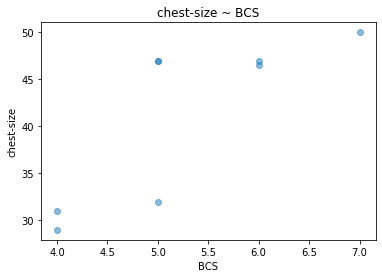

In [33]:
X = new_df.BCS.values
Y = new_df['chest-size'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('chest-size ~ BCS')
plt.xlabel('BCS')
plt.ylabel('chest-size')
plt.show()

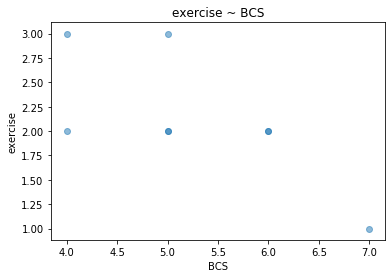

In [34]:
X = new_df.BCS.values
Y = new_df['exercise'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('exercise ~ BCS')
plt.xlabel('BCS')
plt.ylabel('exercise')
plt.show()

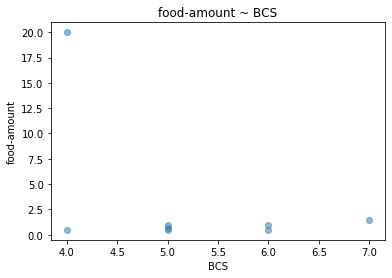

In [38]:
X = new_df.BCS.values
Y = new_df['food-amount'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('food-amount ~ BCS')
plt.xlabel('BCS')
plt.ylabel('food-amount')
plt.show()

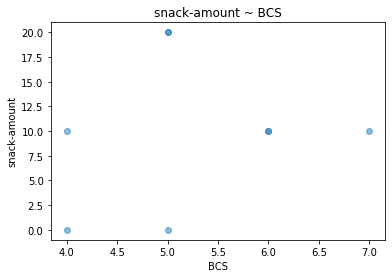

In [39]:
X = new_df.BCS.values
Y = new_df['snack-amount'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('snack-amount ~ BCS')
plt.xlabel('BCS')
plt.ylabel('snack-amount')
plt.show()

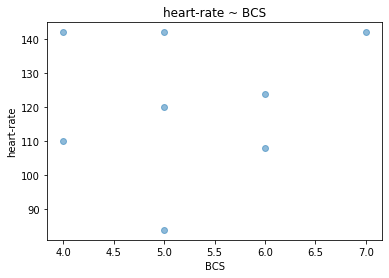

In [40]:
X = new_df.BCS.values
Y = new_df['heart-rate'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('heart-rate ~ BCS')
plt.xlabel('BCS')
plt.ylabel('heart-rate')
plt.show()

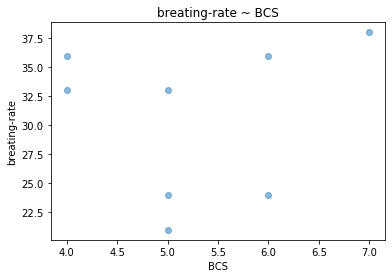

In [41]:
X = new_df.BCS.values
Y = new_df['breating-rate'].values

plt.scatter(X, Y, alpha=0.5)
plt.title('breating-rate ~ BCS')
plt.xlabel('BCS')
plt.ylabel('breating-rate')
plt.show()

In [60]:
from statsmodels.formula.api import ols

In [62]:
new_df.columns

Index(['AFP', 'BCS', 'CRP', 'IL-6', 'age', 'back-length', 'body-heat',
       'breating-rate', 'breed', 'chest-size', 'class', 'defecation',
       'disease', 'diseaseName', 'environment', 'exercise', 'food-amount',
       'food-count', 'food-kind', 'heart-rate', 'lgG', 'mission-id',
       'neck-size', 'provider-code', 'sex', 'shoulder-height', 'snack-amount',
       'species', 'stress', 'type', 'weight'],
      dtype='object')

In [65]:
new_df

,AFP,BCS,CRP,IL-6,age,back-length,body-heat,breating-rate,breed,chest-size,...,mission-id,neck-size,provider-code,sex,shoulder-height,snack-amount,species,stress,type,weight
0,0.57,6,2.85,1.86,10.10,37,38.9,24,DRI,46.50,...,10_001074,30.00,16,CM,24.5,10,10,1.3,B,8.80
1,0.55,4,1.48,4.44,11.10,29,38.1,33,CHI,31.00,...,10_000929,18.98,16,SF,19.0,10,10,8.6,B,2.50
2,0.54,4,0.29,3.27,8.00,24,40.0,36,CHI,29.00,...,10_000957,17.00,16,SF,17.0,0,10,3.6,B,1.80
5,0.55,5,6.55,2.82,4.10,31,38.7,21,POM,47.00,...,10_000930,30.00,16,CM,31.0,0,10,1.8,B,6.86
7,0.55,5,1.15,3.60,5.25,35,40.0,33,POO,32.00,...,10_001073,22.50,16,CM,22.0,20,10,8.9,B,3.86
9,0.55,5,0.24,2.11,2.00,35,39.0,24,POO,47.00,...,10_001088,32.00,10,CM,34.0,20,10,1.3,B,8.80
12,0.55,7,0.33,3.14,5.50,40,38.4,38,ETC,50.00,...,10_000928,31.00,16,CM,30.0,10,10,2.7,B,11.00
14,0.54,6,0.72,4.47,8.00,49,38.4,36,POO,46.99,...,10_001075,28.00,16,CM,30.0,10,10,3.2,B,8.30


In [73]:
df_reg = new_df[['BCS', 'weight', 'back-length', 'chest-size', 'neck-size', 'shoulder-height', 'exercise']]
df_reg.columns = [['BCS', 'weight', 'back_length', 'chest_size', 'neck_size', 'shoulder_height', 'exercise']]

In [88]:
df_reg

,BCS,weight,back_length,chest_size,neck_size,shoulder_height,exercise
0,6,8.80,37,46.50,30.00,24.5,2
1,4,2.50,29,31.00,18.98,19.0,2
2,4,1.80,24,29.00,17.00,17.0,3
5,5,6.86,31,47.00,30.00,31.0,3
7,5,3.86,35,32.00,22.50,22.0,2
9,5,8.80,35,47.00,32.00,34.0,2
12,7,11.00,40,50.00,31.00,30.0,1
14,6,8.30,49,46.99,28.00,30.0,2


In [89]:
res_weight = ols('BCS ~ weight', data = df_reg).fit()
res_weight.summary()

/home/jh20/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     24.14
Date:                Thu, 22 Dec 2022   Prob (F-statistic):            0.00267
Time:                        22:17:21   Log-Likelihood:                -4.6366
No. Observations:                   8   AIC:                             13.27
Df Residuals:                       6   BIC:                             13.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4633      0.404      8.569      0.000       2.474       4.452
weight         0.2753      0.056      4.914      0.003       0.138       0.412
==============================================================================
Omnibus:                        2.050   Durbin-Watson:                   3.218
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                0.789
Skew:                          -0.755   Prob(JB):                        0.674
Kurtosis:                       2.704   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
res_chest = ols('BCS ~ chest_size', data = df_reg).fit()
res_chest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     10.70
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0170
Time:                        22:19:16   Log-Likelihood:                -6.9999
No. Observations:                   8   AIC:                             18.00
Df Residuals:                       6   BIC:                             18.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3788      1.207      1.142      0.297      -1.575       4.333
chest_size     0.0940      0.029      3.270      0.017       0.024       0.164
==============================================================================
Omnibus:                        0.417   Durbin-Watson:                   3.061
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.440
Skew:                           0.001   Prob(JB):                        0.802
Kurtosis:                       1.851   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
res_neck = ols('BCS ~ neck_size', data = df_reg).fit()
res_neck.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     7.582
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0331
Time:                        22:19:39   Log-Likelihood:                -7.8254
No. Observations:                   8   AIC:                             19.65
Df Residuals:                       6   BIC:                             19.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7861      1.285      1.390      0.214      -1.358       4.931
neck_size      0.1323      0.048      2.754      0.033       0.015       0.250
==============================================================================
Omnibus:                        0.001   Durbin-Watson:                   2.522
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.213
Skew:                           0.012   Prob(JB):                        0.899
Kurtosis:                       2.201   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
res_back = ols('BCS ~ back_length', data = df_reg).fit()
res_back.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     9.766
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0205
Time:                        22:19:58   Log-Likelihood:                -7.2290
No. Observations:                   8   AIC:                             18.46
Df Residuals:                       6   BIC:                             18.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4686      1.234      1.190      0.279      -1.552       4.489
back_length     0.1080      0.035      3.125      0.020       0.023       0.193
==============================================================================
Omnibus:                        1.844   Durbin-Watson:                   2.750
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                0.741
Skew:                           0.725   Prob(JB):                        0.690
Kurtosis:                       2.653   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
res_sh = ols('BCS ~ shoulder_height', data = df_reg).fit()
res_sh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     3.246
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.122
Time:                        22:20:26   Log-Likelihood:                -9.3635
No. Observations:                   8   AIC:                             22.73
Df Residuals:                       6   BIC:                             22.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6849      1.459      1.840      0.115      -0.885       6.255
shoulder_height     0.0989      0.055      1.802      0.122      -0.035       0.233
==============================================================================
Omnibus:                        0.716   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.594
Skew:                           0.370   Prob(JB):                        0.743
Kurtosis:                       1.889   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
res_ex = ols('BCS ~ exercise', data = df_reg).fit()
res_ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     5.761
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0533
Time:                        22:20:48   Log-Likelihood:                -8.4011
No. Observations:                   8   AIC:                             20.80
Df Residuals:                       6   BIC:                             20.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6522      1.040      7.359      0.000       5.108      10.197
exercise      -1.1304      0.471     -2.400      0.053      -2.283       0.022
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                0.777
Skew:                          -0.705   Prob(JB):                        0.678
Kurtosis:                       2.418   Cond. No.                         9.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
y = df_reg['BCS']
X = df_reg.drop('BCS', axis = 1)

/home/jh20/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [100]:
res_all = ols('BCS ~ weight + shoulder_height + neck_size +', data = df_reg).fit()
res_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     19.84
Date:                Thu, 22 Dec 2022   Prob (F-statistic):            0.00419
Time:                        22:21:56   Log-Likelihood:                -2.3327
No. Observations:                   8   AIC:                             10.67
Df Residuals:                       5   BIC:                             10.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9085      0.804      6.105      0.002       2.842       6.975
weight              0.4163      0.085      4.899      0.004       0.198       0.635
shoulder_height    -0.0910      0.046     -1.973      0.105      -0.210       0.028
==============================================================================
Omnibus:                        1.106   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.606
Skew:                           0.064   Prob(JB):                        0.739
Kurtosis:                       1.658   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
variables = df_reg.columns[1:].tolist()
variables

[('weight',),
 ('back_length',),
 ('chest_size',),
 ('neck_size',),
 ('shoulder_height',),
 ('exercise',)]

In [152]:
import statsmodels.api as sm

variables = df_reg.columns[1:].tolist()

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    
    for col in remainder: 
        X = df_reg[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            
            selected_X = df_reg[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_reg[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()
/home/jh20/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [153]:
print(selected_variables)

[('weight',)]


In [155]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps, adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

TypeError: sequence item 0: expected str instance, tuple found

<Figure size 720x720 with 0 Axes>